# Import the liberaries

In [4]:
#!pip install mat4py
import scipy.io
import pandas as pd
import numpy as np
from mat4py import loadmat
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

# read the MAT format dataset by Scipy liberary and reshape it




In [6]:
mat = scipy.io.loadmat('/Users/kavianlari/Downloads/code/DATA.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}

Groups=['Z', 'S', 'O', 'N', 'F']
Converted_dataset={}
f=0
for i in Groups:
    Converted_dataset[i]=mat['DATA'][0][0][f]
    f+=1
for i in Converted_dataset:
    Converted_dataset[i]=[Converted_dataset[i][j][0] for j in range(len(Converted_dataset[i]))]

for i in Converted_dataset:
    Converted_dataset[i]=np.array([Converted_dataset[i]]).reshape(100,4097)


# read the MAT fortmat dataset by Mat4py liberary and reshape it

In [7]:
mat2=loadmat('/Users/kavianlari/Downloads/code/DATA.mat')['DATA']
Converted_Dataset_2={}
for i in mat2:
    Converted_Dataset_2[i]=np.array([mat2[i]]).reshape(100,4097)

# plotting a sample signal

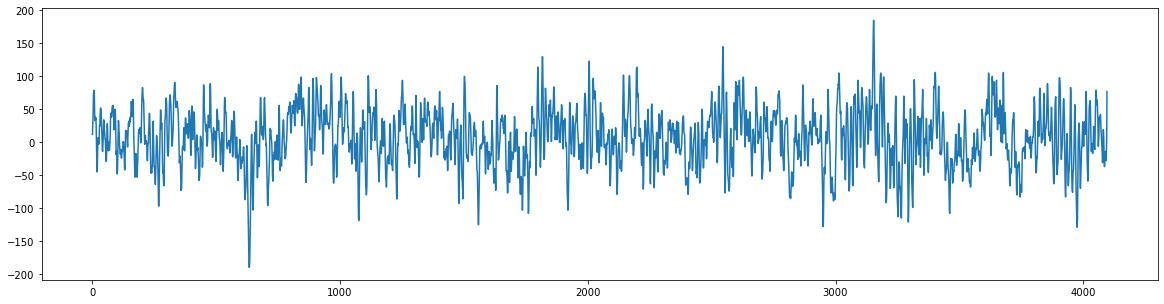

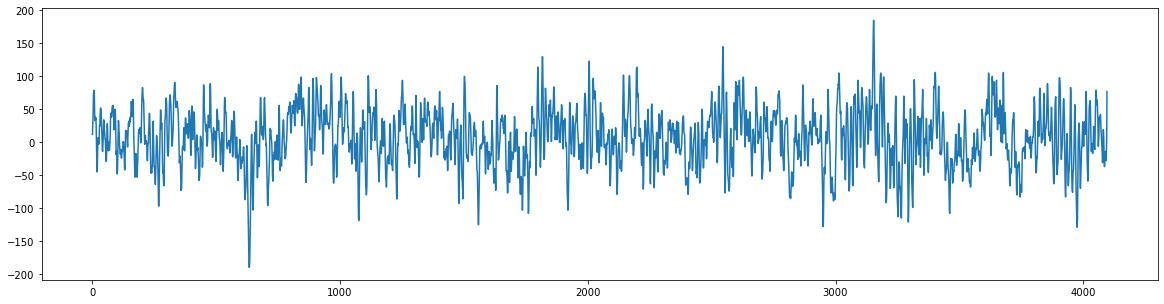

In [8]:
#Scipy liberary 
plt.figure(figsize=(20,5))
plt.plot(Converted_dataset['Z'][0])
plt.show(); 


#Mat4py liberary
plt.figure(figsize=(20,5))
plt.plot(Converted_Dataset_2['Z'][0])
plt.show()

# LNDP Function

In [130]:
def LNDP(signals,m=8):

    LNDP_final=[]
    for signal in signals:

#finding EEG segment
        EEG_seg=[]
        m_=int(m/2)
        start=m_
        for i in range(len(signal)):
            sub_list=(signal[start-m_:start+m_+1])
            EEG_seg.append(sub_list)
            start+=1
            if start+(m_+1)>len(signal):
                break
        
# finding C_N_List 

        C_N_List=[]
        for i in EEG_seg:
            list__=[]
            for n in range(m):
                if n==m+1:
                    break
                else:
                    list__.append(i[n+1]-i[n])
            C_N_List.append(list__)
        C_N_List=np.array(C_N_List)

#compute LNDP_list

        LNDP_List=np.copy(C_N_List)
        LNDP_List[LNDP_List>=0]=1
        LNDP_List[LNDP_List<0]=0

#compute the LNDP
        LNDP=[]
        for i in LNDP_List:
            a,n=(0,m-1)
            for j in i:
                a+=(j*2**n)
                n-=1
            LNDP.append(a)
        LNDP,_=np.histogram(LNDP,256)
        LNDP_final.append(LNDP)
    return(np.array(LNDP_final))

# Creating all Dataset LNDP

In [131]:
LNDP_Z,LNDP_S,LNDP_O,LNDP_N,LNDP_F=np.array([]),np.array([]),np.array([]),np.array([]),np.array([])

LNDP_Z=LNDP(Converted_dataset['Z'])
LNDP_S=LNDP(Converted_dataset['S'])
LNDP_O=LNDP(Converted_dataset['O'])
LNDP_N=LNDP(Converted_dataset['N'])
LNDP_F=LNDP(Converted_dataset['F'])


# sample plotting of LNDP

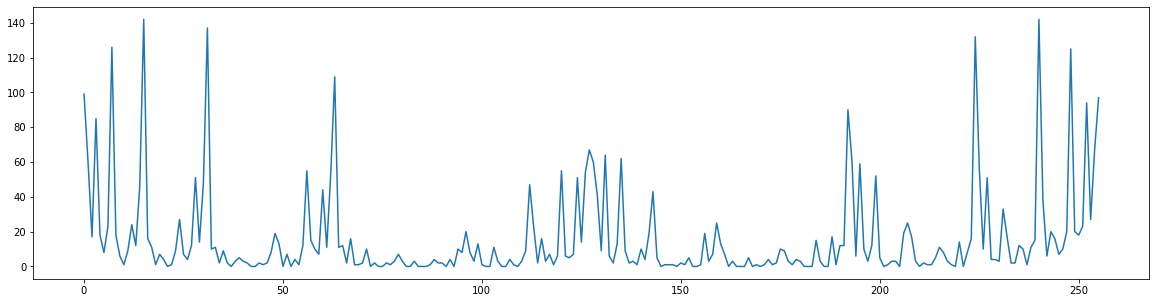

In [132]:
plt.figure(figsize=(20,5))
plt.plot(LNDP_Z[80])
plt.show();

# defining classifier and different m

In [186]:
Classifiers =[KNeighborsClassifier(),
              svm.SVC(),
              DecisionTreeClassifier(),
              MLPClassifier(hidden_layer_sizes=(40,), max_iter=1000)]
ms = [2, 4, 6, 8, 10, 12]
names = ['KN', 'SVM', 'DT', 'MLP']


# finding mean and std for different classifier and different m for each LNDP

In [262]:
score_final=[]
for m in ms:
    LNDP_Z,LNDP_S,LNDP_O,LNDP_N,LNDP_F=np.array([]),np.array([]),np.array([]),np.array([]),np.array([])

    LNDP_Z=LNDP(Converted_dataset['Z'],m)
    LNDP_S=LNDP(Converted_dataset['S'],m)
    LNDP_O=LNDP(Converted_dataset['O'],m)
    LNDP_N=LNDP(Converted_dataset['N'],m)
    LNDP_F=LNDP(Converted_dataset['F'],m)
    
    
    for clf,name in zip(Classifiers,names):
    
        X_feature=np.vstack((LNDP_Z,LNDP_S))
        y_target=np.hstack((np.zeros(100),np.ones(100)))
        score=cross_val_score(clf,X_feature,y_target,cv=10)
        
        print(name,': mean=',np.round(np.mean(score),decimals=4),', and the std=',np.round(np.std(score),decimals=4))
        score_final.append(np.round(np.mean(score),decimals=4))
        score_final.append(np.round(np.std(score),decimals=4))
    print('LNDP_Z,LNDP_S for m=',m)    
    print('------------------')
    
    for clf,name in zip(Classifiers,names):
    
        X_feature=np.vstack((LNDP_N,LNDP_S))
        y_target=np.hstack((np.zeros(100),np.ones(100)))
        score=cross_val_score(clf,X_feature,y_target,cv=10)
        
        print(name,': mean=',np.round(np.mean(score),decimals=4),', and the std=',np.round(np.std(score),decimals=4))
        score_final.append(np.round(np.mean(score),decimals=4))
        score_final.append(np.round(np.std(score),decimals=4))
    print('LNDP_N,LNDP_S for m=',m)    
    print('------------------')
    
    for clf,name in zip(Classifiers,names):
    
        X_feature=np.vstack((LNDP_Z,LNDP_F))
        y_target=np.hstack((np.zeros(100),np.ones(100)))
        score=cross_val_score(clf,X_feature,y_target,cv=10)
        
        print(name,': mean=',np.round(np.mean(score),decimals=4),', and the std=',np.round(np.std(score),decimals=4))
        score_final.append(np.round(np.mean(score),decimals=4))
        score_final.append(np.round(np.std(score),decimals=4))
    print('LNDP_Z,LNDP_F for m=',m)    
    print('------------------')
    
    for clf,name in zip(Classifiers,names):
    
        X_feature=np.vstack((LNDP_Z,LNDP_O,LNDP_N,LNDP_F,LNDP_S))
        y_target=np.hstack((np.zeros(400),np.ones(100)))
        score=cross_val_score(clf,X_feature,y_target,cv=10)
        
        print(name,': mean=',np.round(np.mean(score),decimals=4),', and the std=',np.round(np.std(score),decimals=4))
        score_final.append(np.round(np.mean(score),decimals=4))
        score_final.append(np.round(np.std(score),decimals=4))
    print('LNDP_Z,LNDP_O,LNDP_N,LNDP_F,LNDP_S for m=',m)    
    print('------------------')
    

score_final=np.array(score_final).reshape(24,8)
    
    

KN : mean= 0.985 , and the std= 0.032
SVM : mean= 0.985 , and the std= 0.032
DT : mean= 0.97 , and the std= 0.0332
MLP : mean= 0.74 , and the std= 0.2888
LNDP_Z,LNDP_S for m= 2
------------------
KN : mean= 0.95 , and the std= 0.0387
SVM : mean= 0.925 , and the std= 0.0602
DT : mean= 0.925 , and the std= 0.068
MLP : mean= 0.71 , and the std= 0.2596
LNDP_N,LNDP_S for m= 2
------------------
KN : mean= 0.68 , and the std= 0.103
SVM : mean= 0.545 , and the std= 0.1274
DT : mean= 0.655 , and the std= 0.0789
MLP : mean= 0.615 , and the std= 0.1305
LNDP_Z,LNDP_F for m= 2
------------------
KN : mean= 0.924 , and the std= 0.0445
SVM : mean= 0.86 , and the std= 0.042
DT : mean= 0.884 , and the std= 0.0472
MLP : mean= 0.908 , and the std= 0.0574
LNDP_Z,LNDP_O,LNDP_N,LNDP_F,LNDP_S for m= 2
------------------
KN : mean= 0.99 , and the std= 0.02
SVM : mean= 0.995 , and the std= 0.015
DT : mean= 0.985 , and the std= 0.0229
MLP : mean= 0.975 , and the std= 0.0461
LNDP_Z,LNDP_S for m= 4
-------------

# Creating the LNDP_Score dataframe  

In [266]:
MLs=['KN','KN', 'SVM','SVM', 'DT','DT', 'MLP', 'MLP']
scores_per_ML=['mean','std','mean','std','mean','std','mean','std']
M_values=[2,2,2,2,4,4,4,4,6,6,6,6,8,8,8,8,10,10,10,10,12,12,12,12]
subjects=['Z-S','N-S','Z-F','ZONF-S',
          'Z-S','N-S','Z-F','ZONF-S',
          'Z-S','N-S','Z-F','ZONF-S',
          'Z-S','N-S','Z-F','ZONF-S',
          'Z-S','N-S','Z-F','ZONF-S',
          'Z-S','N-S','Z-F','ZONF-S',]
index=pd.MultiIndex.from_tuples((list(zip(M_values,subjects))),names=['M_Values','Sibject'])
columns=pd.MultiIndex.from_tuples((list(zip(MLs,scores_per_ML))),names=['ML','Score_per_ML'])

LNDP_DF=pd.DataFrame(score_final,index=index,columns=columns)
LNDP_DF


ML                   KN            SVM             DT            MLP        
Score_per_ML       mean     std   mean     std   mean     std   mean     std
M_Values Sibject                                                            
2        Z-S      0.985  0.0320  0.985  0.0320  0.970  0.0332  0.740  0.2888
         N-S      0.950  0.0387  0.925  0.0602  0.925  0.0680  0.710  0.2596
         Z-F      0.680  0.1030  0.545  0.1274  0.655  0.0789  0.615  0.1305
         ZONF-S   0.924  0.0445  0.860  0.0420  0.884  0.0472  0.908  0.0574
4        Z-S      0.990  0.0200  0.995  0.0150  0.985  0.0229  0.975  0.0461
         N-S      0.975  0.0335  0.930  0.0640  0.960  0.0374  0.795  0.2962
         Z-F      0.985  0.0229  0.960  0.0374  1.000  0.0000  0.940  0.0889
         ZONF-S   0.936  0.0436  0.880  0.0727  0.914  0.0844  0.904  0.0809
6        Z-S      0.995  0.0150  0.995  0.0150  0.935  0.0867  0.880  0.2795
         N-S      0.970  0.0332  0.955  0.0472  0.965  0.0320  0.860  0.1881
         Z-F      1.000  0.0000  1.000  0.0000  0.965  0.0391  0.975  0.0602
         ZONF-S   0.948  0.0360  0.880  0.0805  0.912  0.0854  0.962  0.0374
8        Z-S      0.985  0.0320  0.990  0.0200  0.905  0.0568  0.980  0.0400
         N-S      0.975  0.0335  0.955  0.0522  0.965  0.0320  0.955  0.0350
         Z-F      1.000  0.0000  1.000  0.0000  0.950  0.0500  0.980  0.0245
         ZONF-S   0.954  0.0323  0.960  0.0253  0.892  0.0776  0.964  0.0332
10       Z-S      0.985  0.0320  0.990  0.0200  0.920  0.0332  0.985  0.0229
         N-S      0.975  0.0335  0.955  0.0522  0.960  0.0374  0.955  0.0269
         Z-F      1.000  0.0000  1.000  0.0000  0.955  0.0415  0.955  0.0472
         ZONF-S   0.954  0.0323  0.960  0.0253  0.894  0.0614  0.960  0.0390
12       Z-S      0.980  0.0332  0.985  0.0320  0.920  0.0245  0.985  0.0450
         N-S      0.975  0.0335  0.955  0.0522  0.960  0.0374  0.950  0.0447
         Z-F      1.000  0.0000  1.000  0.0000  0.965  0.0450  0.995  0.0150
         ZONF-S   0.954  0.0323  0.960  0.0253  0.902  0.0724  0.962  0.0404